In [1]:
from libeq.data_structure import SolverData
from libeq import EqSolver
from libeq.species_conc import species_concentration
import numpy as np
import matplotlib.pyplot as plt

%load_ext pyinstrument

# Create SolverData object
solver_data = SolverData.load_from_bstac(
    "/Users/lorenzo/Coding/libeq/notebooks/Zn-EDTA"
)

In [2]:
solution, log_beta = EqSolver(solver_data)

In [3]:
initial_guess = np.array([])

In [4]:
final_c = species_concentration(
    solution,
    log_beta,
    solver_data.stoichiometry,
    solver_data.solid_stoichiometry,
    full=True,
)
initial_c = species_concentration(
    initial_guess,
    log_beta,
    solver_data.stoichiometry,
    solver_data.solid_stoichiometry,
    full=True,
)

TypeError: species_concentration() got multiple values for argument 'full'

In [ ]:
squared_diff = (final_c - initial_c) ** 2
mean_squared_diff_col = np.mean(squared_diff, axis=0)
mean_squared_diff_col_charge = np.mean(squared_diff, axis=0) * np.abs(
    np.concatenate((solver_data.charges, solver_data.species_charges))
)

mean_squared_diff_row = np.mean(squared_diff, axis=1)

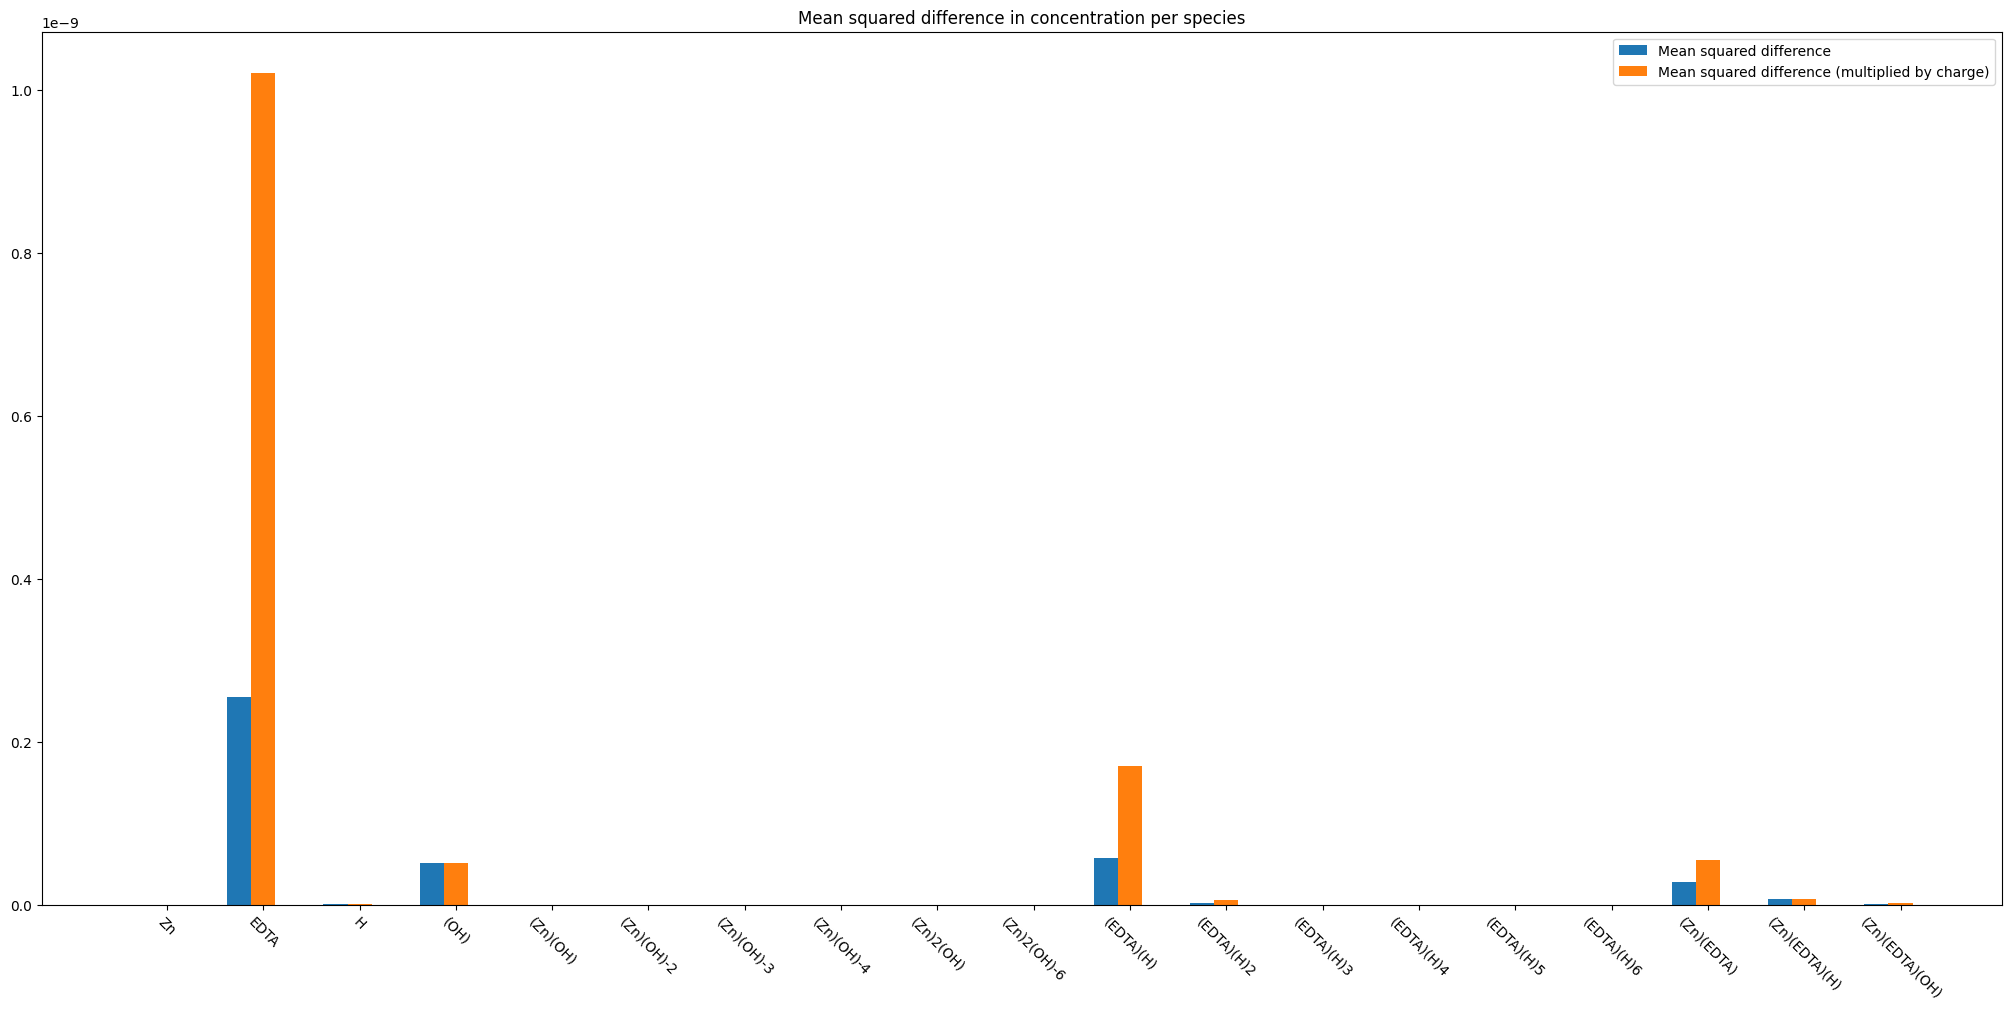

In [ ]:
plot_series = {
    "Mean squared difference": mean_squared_diff_col,
    "Mean squared difference (multiplied by charge)": mean_squared_diff_col_charge,
}

x = np.arange(len(solver_data.species_names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout="constrained", figsize=(20, 10))

for attribute, measurement in plot_series.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

plt.xticks(x + width, solver_data.species_names, rotation=-45)
plt.title("Mean squared difference in concentration per species")
plt.legend();

Text(0, 0.5, 'pH')

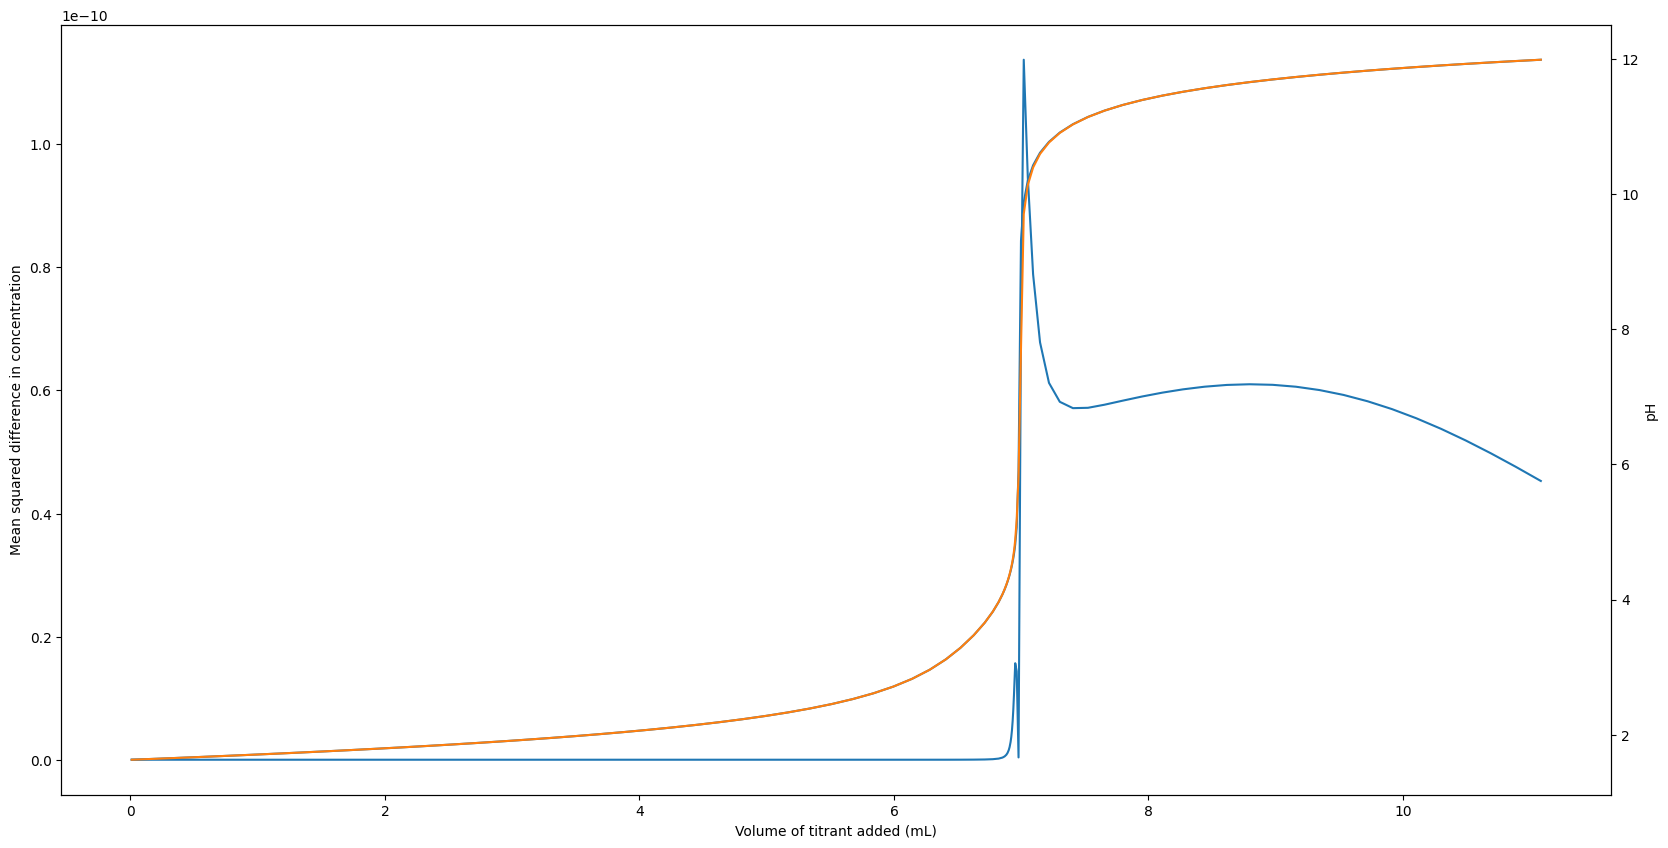

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 10))

plt.plot(solver_data.v_add, mean_squared_diff_row)
plt.ylabel("Mean squared difference in concentration")
plt.xlabel("Volume of titrant added (mL)")

ax2 = ax1.twinx()
plt.plot(solver_data.v_add, -np.log10(final_c[:, 2]))
plt.plot(solver_data.v_add, -np.log10(initial_c[:, 2]))

plt.ylabel("pH")

In [ ]:
# Assuming 'arr' is your 2D numpy array
np.unravel_index(
    np.argmax((final_c - initial_c) ** 2), ((final_c - initial_c) ** 2).shape
)

(61, 10)

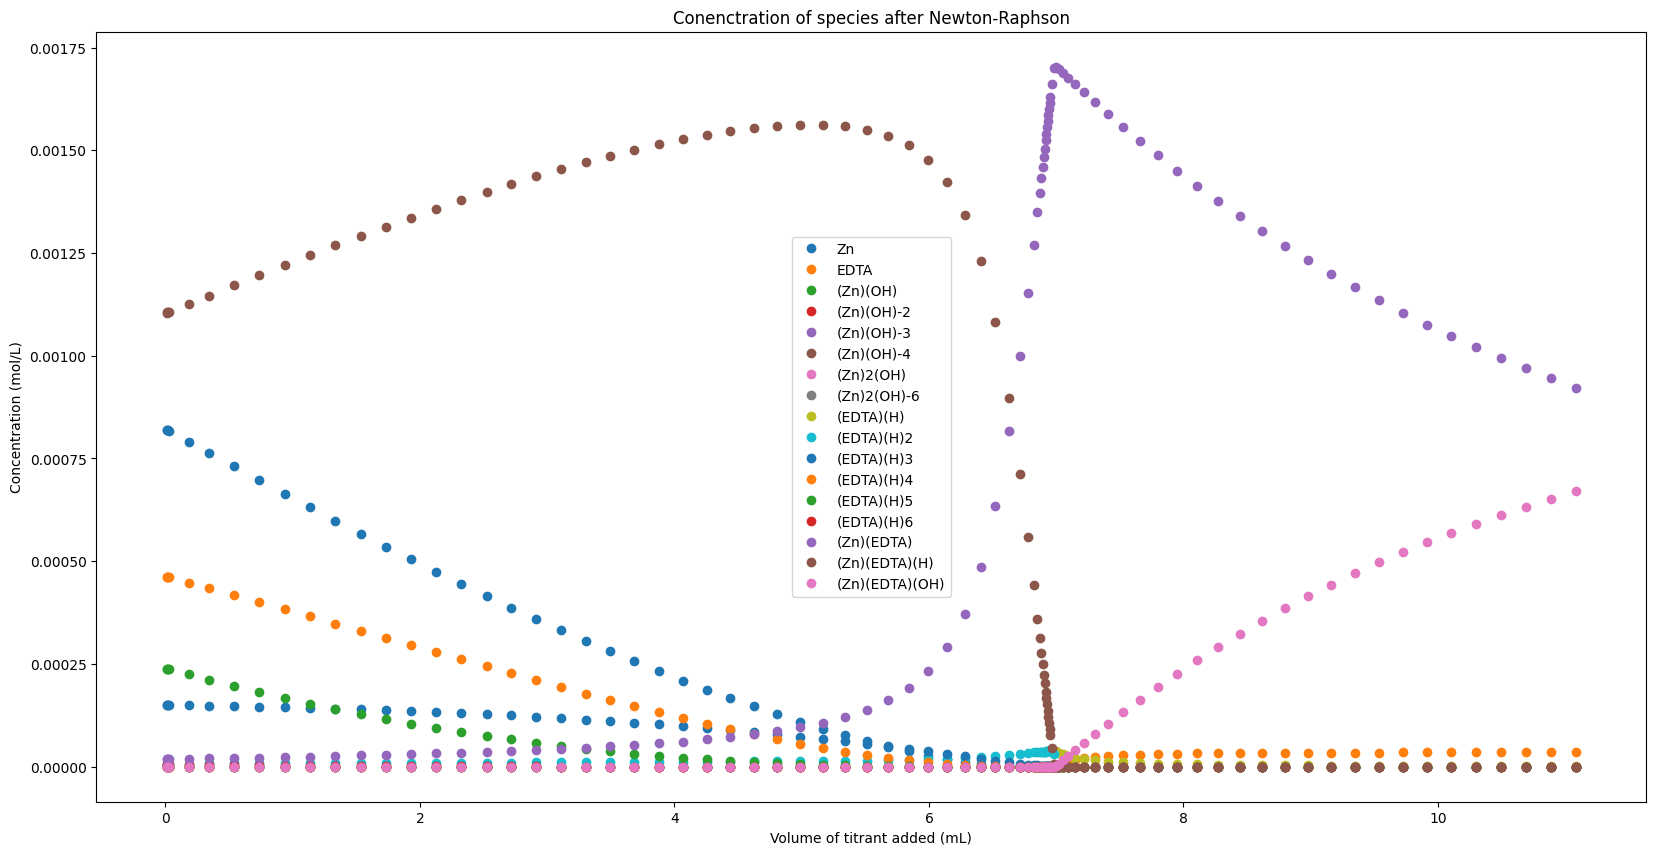

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.plot(
    solver_data.v_add,
    final_c[:, [i for i in range(final_c.shape[1]) if i not in [2, 3]]],
    "o",
)
plt.title("Conenctration of species after Newton-Raphson")
plt.ylabel("Concentration (mol/L)")
plt.xlabel("Volume of titrant added (mL)")
plt.legend(
    handles=ax1.lines,
    labels=solver_data.species_names[:2] + solver_data.species_names[4:],
);

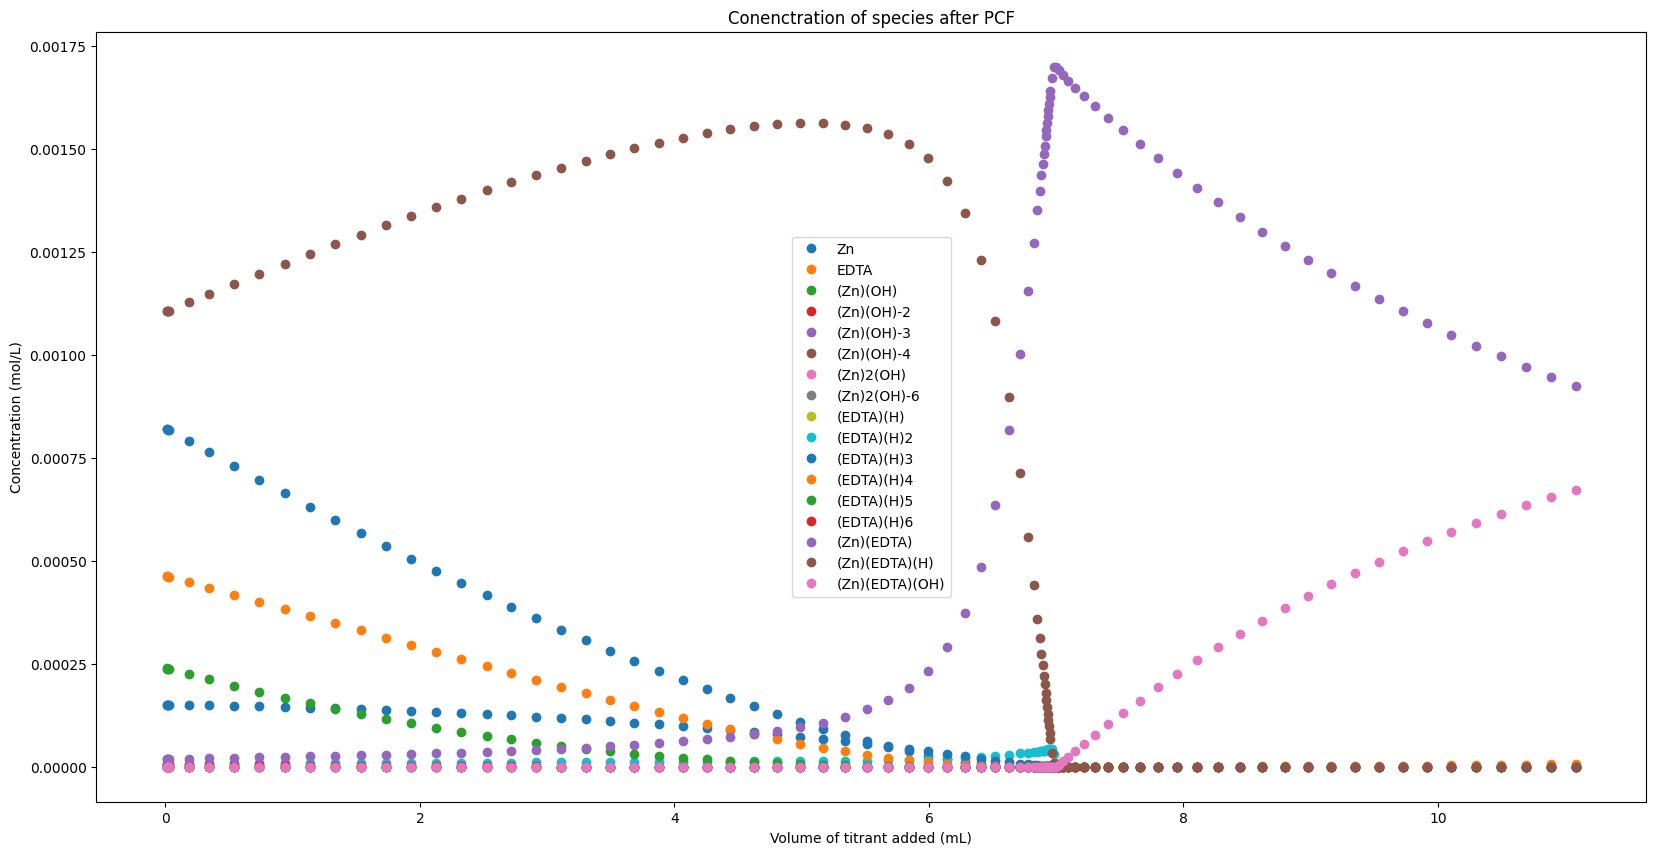

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.plot(
    solver_data.v_add,
    initial_c[:, [i for i in range(initial_c.shape[1]) if i not in [2, 3]]],
    "o",
)
plt.ylabel("Concentration (mol/L)")
plt.xlabel("Volume of titrant added (mL)")
plt.title("Conenctration of species after PCF")
plt.legend(
    handles=ax1.lines,
    labels=solver_data.species_names[:2] + solver_data.species_names[4:],
);

In [ ]:
charges = np.atleast_2d(
    np.concatenate((solver_data.charges, solver_data.species_charges))
)
final_i = (final_c * (charges**2)).sum(axis=1) / 2
initial_i = (initial_c * (charges**2)).sum(axis=1) / 2

final_i_buffer = (final_c * (charges**2) + 0.184).sum(axis=1) / 2
initial_i_buffer = (initial_c * (charges**2) + 0.184).sum(axis=1) / 2

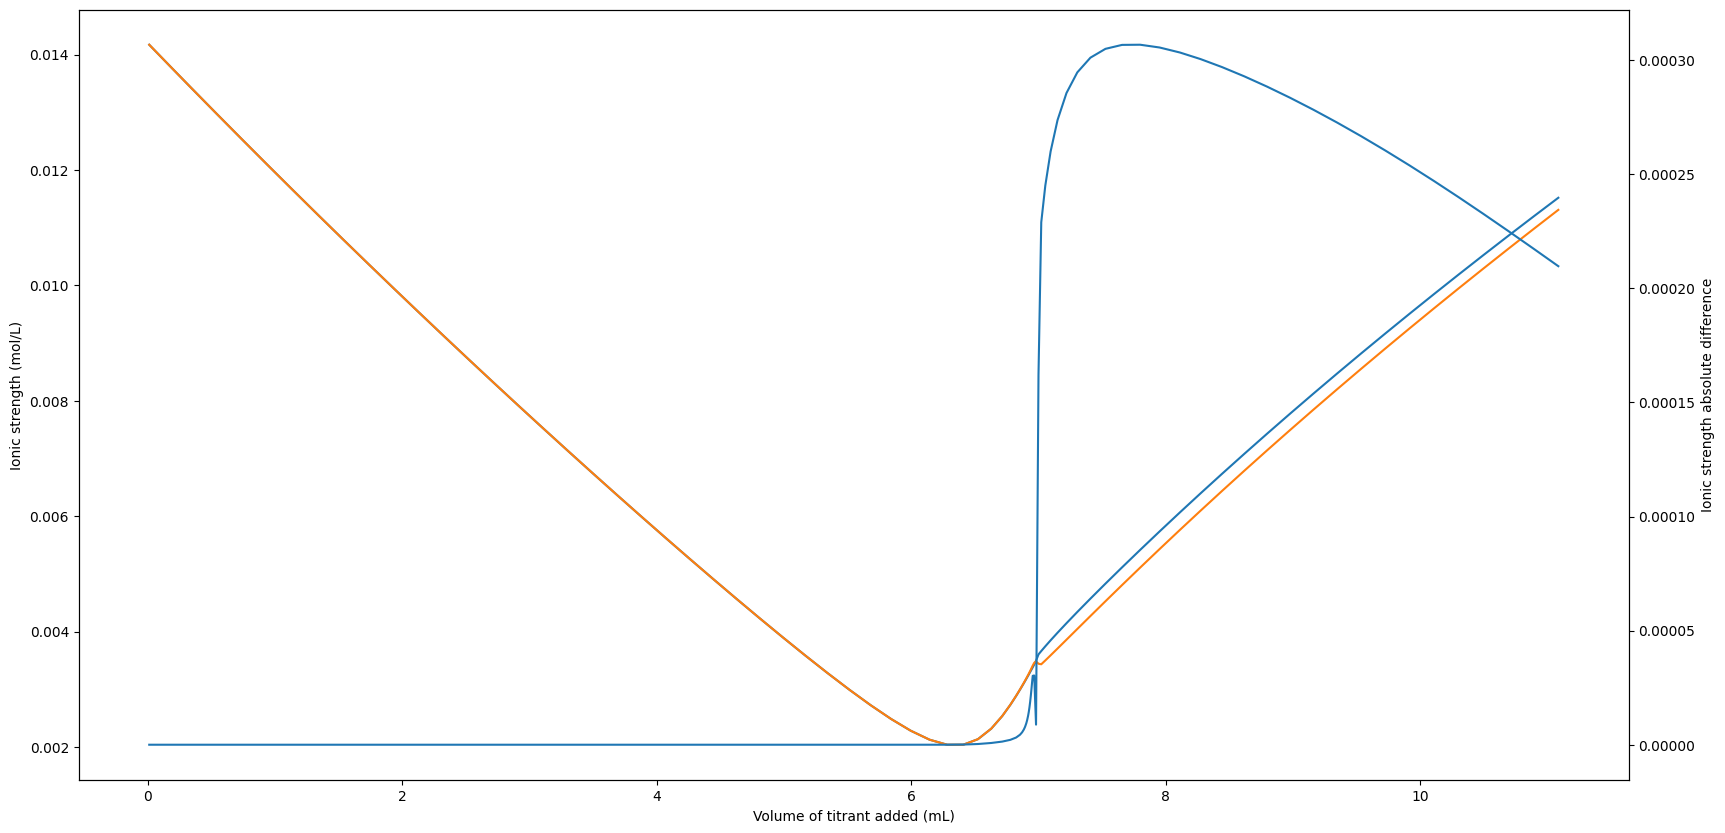

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.plot(solver_data.v_add, final_i, label="NR Ionic strength")
plt.plot(solver_data.v_add, initial_i, label="PCF Ionic strength")
plt.ylabel("Ionic strength (mol/L)")
plt.xlabel("Volume of titrant added (mL)")

ax2 = ax1.twinx()

plt.plot(solver_data.v_add, np.abs(final_i - initial_i), label="Diff")
plt.ylabel("Ionic strength absolute difference");

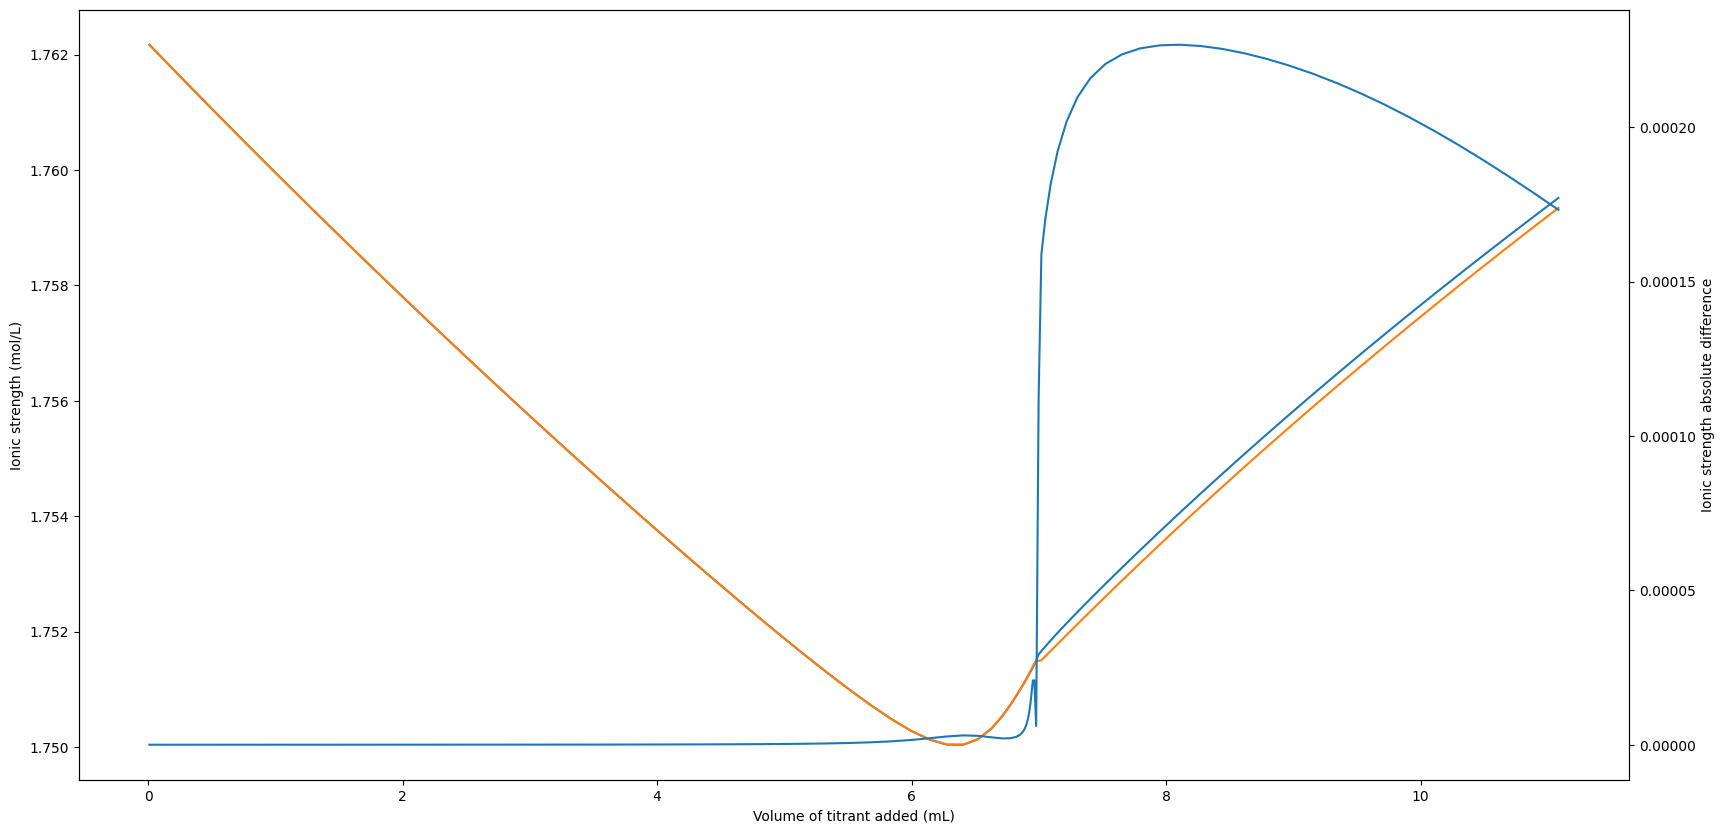

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.plot(solver_data.v_add, final_i_buffer, label="NR Ionic strength")
plt.plot(solver_data.v_add, initial_i_buffer, label="PCF Ionic strength")
plt.ylabel("Ionic strength (mol/L)")
plt.xlabel("Volume of titrant added (mL)")

ax2 = ax1.twinx()

plt.plot(solver_data.v_add, np.abs(final_i_buffer - initial_i_buffer), label="Diff")
plt.ylabel("Ionic strength absolute difference");